In [380]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from matplotlib import pyplot as plt
%matplotlib inline
import datetime
import pandas as pd
from sklearn import preprocessing as pp
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

In [381]:
ds = pd.read_csv('mushrooms.csv')
dat = ds.values

print dat.shape

headers = list(ds.columns.values) #store features of mushrooms

(8124, 23)


In [382]:
#IGNORE THIS CELL

arr = np.array([1,2,3])
b = np.array([4, 5, 6])

arr = np.vstack((arr, b))
#q = np.concatenate((arr,b), axis=0)
#print arr

le = pp.LabelEncoder()
le.fit(dat[:, 0])
y = le.transform(dat[:, 0])
le1 = pp.LabelEncoder()
le1.fit(dat[:, 1])
z = le1.transform(dat[:, 1])
le2 = pp.LabelEncoder()
le2.fit(dat[:, 2])
zz = le2.transform(dat[:, 2])

# y = np.vstack(y, z)
# z = np.vstack(z)
# y = np.vstack(y)
qqw = np.vstack((y, z))
qqw = np.vstack((qqw, zz))
#print qqw.T

In [383]:
#Data Preprocessing
l = pp.LabelEncoder()
l.fit(dat[:, 0])
dataa = l.transform(dat[:, 0])

for ix in range(1, dat.shape[1]):
    le = pp.LabelEncoder()
    le.fit(dat[:, ix])
    y = le.transform(dat[:, ix])
    dataa = np.vstack((dataa , y))
    
data = dataa.T

cate = data[:, 0] #One hot encoding for Neural Network implementation

print data.shape ##FINALLLYY O YEAH!!!

(8124, 23)


In [384]:
split = int(0.80 * data.shape[0])

x_train = data[:split , 1:]
y_train = data[:split, 0]

x_test = data[split: , 1:]
y_test = data[split: , 0]

print x_train.shape, y_train.shape
print x_test.shape, y_test.shape

(6499, 22) (6499,)
(1625, 22) (1625,)


<h3> Decision Tree Implementation </h3>

In [385]:
acc = []
ans = []

for ix in range(10):
    dt = DTC()
    
    start = datetime.datetime.now()
    dt.fit(x_train, y_train)
    end = datetime.datetime.now()

    #print "Training Time : ", end-start

    start = datetime.datetime.now()
    score = dt.score(x_test, y_test)
    end = datetime.datetime.now()

    #print "Testing Time : ", end-start

    #print "Accurcy : ", score*100 
    acc.append(score*100)
    tem = dt.feature_importances_
    ans.append(tem)
    #print "\n"

Features most indicative of a poisonous mushroom wrt Decision Tree Model :  spore-print-color


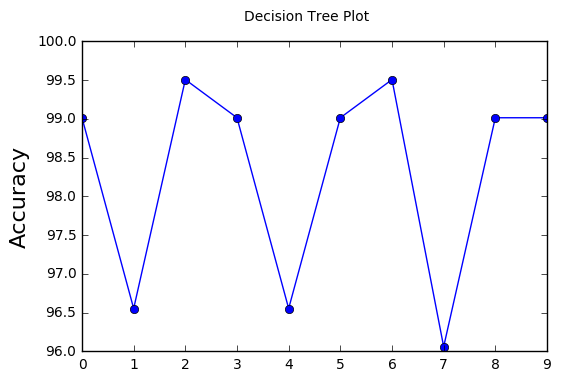

In [386]:
temp = [] 
for ix in range(0, len(ans)):
    temp.append(np.argmax(ans[ix]))
    
mode = max(set(temp), key=temp.count) #find mode for features importance in decision trees
print "Features most indicative of a poisonous mushroom wrt Decision Tree Model : ", headers[mode+1]

plt.figure(0)
plt.suptitle('Decision Tree Plot', fontsize=10)
plt.plot(acc, '-o')
plt.ylabel('Accuracy', fontsize=16)
plt.show()

<h3> Random Forest Implementation </h3>

In [387]:
est = [] #taking variable estimators
acc = []
ans = []
for iy in range(2, 200, 20):
    est.append(iy)

for ix in range(len(est)):
    rf = RFC(n_estimators=est[ix], n_jobs=2)
    #print "No. of Decision Trees : ", est[ix]
    
    start = datetime.datetime.now()
    rf.fit(x_train, y_train)
    end = datetime.datetime.now()

    #print "Training Time : ", end-start

    start = datetime.datetime.now()
    score = rf.score(x_test, y_test)
    end = datetime.datetime.now()

    #print "Testing Time : ", end-start

    #print "Accurcy : ", score*100 
    acc.append(score*100)
    tem = rf.feature_importances_
    ans.append(tem)
    #print "\n"

Features most indicative of a poisonous mushroom wrt Random Forest Model :  odor


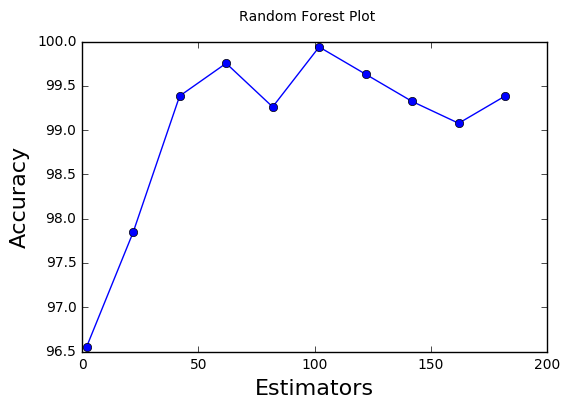

In [388]:
temp = []

for ix in range(0, len(ans)):
    temp.append(np.argmax(ans[ix]))

mode = max(set(temp), key=temp.count) #find mode for features importance in variable estimators
print "Features most indicative of a poisonous mushroom wrt Random Forest Model : ", headers[mode+1]

plt.figure(1)
plt.suptitle('Random Forest Plot', fontsize=10)
plt.plot(est, acc, '-o')
plt.xlabel('Estimators', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

<h3> Logistic Regression Implementation </h3>

In [389]:
lr = LR(n_jobs=-1)

start = datetime.datetime.now()
lr.fit(x_train, y_train)
end = datetime.datetime.now()

print "Training Time : ", end-start

start = datetime.datetime.now()
score = lr.score(x_test, y_test)
end = datetime.datetime.now()

print "Testing Time : ", end-start

print "Accurcy : ", score*100 

features = dt.feature_importances_
#print "\n"

Training Time :  0:00:00.108130
Testing Time :  0:00:00.000907
Accurcy :  89.4153846154


In [390]:
temp = np.argmax(features)

print "Features most indicative of a poisonous mushroom wrt Logistic Regression Model : ", headers[temp+1]

Features most indicative of a poisonous mushroom wrt Logistic Regression Model :  spore-print-color


<h3> kNN Implementation </h3>

In [391]:
acc = []
ans = []
neighbours = []

for ix in range(3, 200, 20):
    neighbours.append(ix)

for ix in range(len(neighbours)):
    knn = KNN(n_neighbors=neighbours[ix], n_jobs=-1)
    
    start = datetime.datetime.now()
    knn.fit(x_train, y_train)
    end = datetime.datetime.now()

    #print "Training Time : ", end-start

    start = datetime.datetime.now()
    score = knn.score(x_test, y_test)
    end = datetime.datetime.now()

    #print "Testing Time : ", end-start

    #print "Accurcy : ", score*100 
    acc.append(score*100)
    temp = dt.feature_importances_
    ans.append(temp)
    #print "\n"

Features most indicative of a poisonous mushroom wrt kNN :  spore-print-color


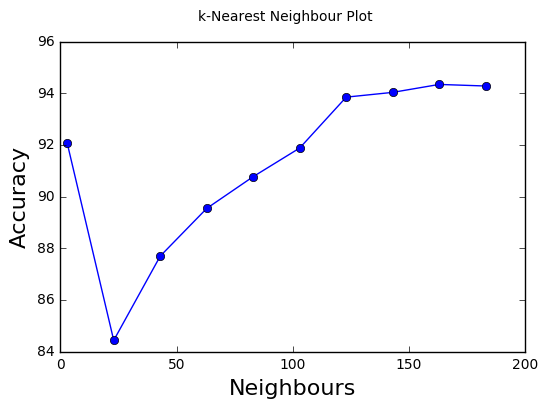

In [392]:
temp = []

for ix in range(0, len(ans)):
    temp.append(np.argmax(ans[ix]))

mode = max(set(temp), key=temp.count) #find mode for features importance in variable estimators
print "Features most indicative of a poisonous mushroom wrt kNN : ", headers[mode+1]

plt.figure(2)
plt.suptitle('k-Nearest Neighbour Plot', fontsize=10)
plt.plot(neighbours, acc, '-o')
plt.xlabel('Neighbours', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

<h3> Neural Network Implementation Using Keras </h3> 

In [393]:
y = np_utils.to_categorical(cate)
Y_train = y[:split]
Y_test = y[split:]

print x_train.shape, x_test.shape
print y_train.shape, y_test.shape
print data.shape

(6499, 22) (1625, 22)
(6499,) (1625,)
(8124, 23)


In [394]:
model = Sequential()

model.add(Dense(11, input_shape=(22,)))
model.add(Activation('relu'))

model.add(Dense(5))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_46 (Dense)                 (None, 11)            253         dense_input_16[0][0]             
____________________________________________________________________________________________________
activation_46 (Activation)       (None, 11)            0           dense_46[0][0]                   
____________________________________________________________________________________________________
dense_47 (Dense)                 (None, 5)             60          activation_46[0][0]              
____________________________________________________________________________________________________
activation_47 (Activation)       (None, 5)             0           dense_47[0][0]                   
___________________________________________________________________________________________

In [395]:
hist = model.fit(x_train, Y_train,
         nb_epoch=70,
         shuffle=True,
         batch_size=128,
         validation_data=(x_test, Y_test))

Train on 6499 samples, validate on 1625 samples
Epoch 1/70
6499/6499 [==============================] - 0s - loss: 0.7276 - acc: 0.5890 - val_loss: 0.7540 - val_acc: 0.4308
Epoch 2/70
6499/6499 [==============================] - 0s - loss: 0.5810 - acc: 0.6916 - val_loss: 0.6043 - val_acc: 0.6880
Epoch 3/70
6499/6499 [==============================] - 0s - loss: 0.5132 - acc: 0.7617 - val_loss: 0.4923 - val_acc: 0.8338
Epoch 4/70
6499/6499 [==============================] - 0s - loss: 0.4594 - acc: 0.8070 - val_loss: 0.4260 - val_acc: 0.8406
Epoch 5/70
6499/6499 [==============================] - 0s - loss: 0.4140 - acc: 0.8297 - val_loss: 0.3927 - val_acc: 0.8425
Epoch 6/70
6499/6499 [==============================] - 0s - loss: 0.3762 - acc: 0.8487 - val_loss: 0.3678 - val_acc: 0.8769
Epoch 7/70
6499/6499 [==============================] - 0s - loss: 0.3423 - acc: 0.8667 - val_loss: 0.3530 - val_acc: 0.8929
Epoch 8/70
6499/6499 [==============================] - 0s - loss: 0.3138 - a

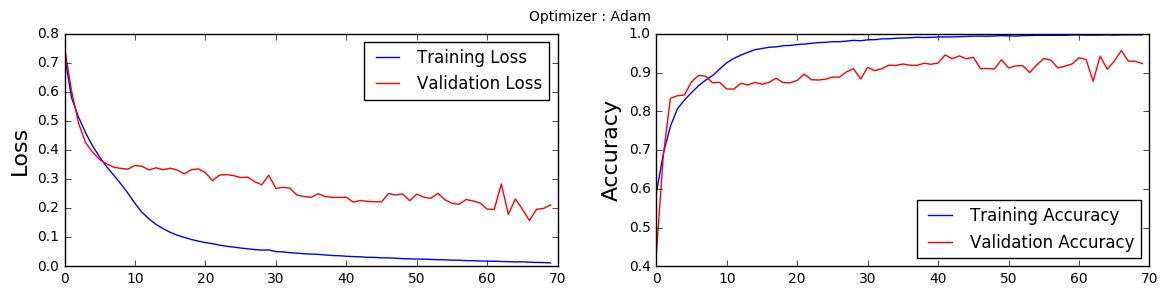

In [396]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], 'b', label='Training Loss')
plt.plot(hist.history['val_loss'], 'r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['acc'], 'b', label='Training Accuracy')
plt.plot(hist.history['val_acc'], 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## Plots with different Optimizers are ploted below ##

![alt text](https://cloud.githubusercontent.com/assets/15228557/21239673/ebc262ac-c32d-11e6-80da-08e35b4fde27.jpg "Plot with RMSprop Optimizer")

<br><br>

![alt text](https://cloud.githubusercontent.com/assets/15228557/21239677/f45d369e-c32d-11e6-940a-f019fd82a283.jpg "Plot with Adagrad Optimizer")

<br><br>

![alt text](https://cloud.githubusercontent.com/assets/15228557/21239685/fb7c3574-c32d-11e6-87dc-47bcecd79b94.jpg "Plot with Stochastic Gradient Descent")

